# **INTELIGENCIA DEL NEGOCIO / Business Intelligence**
## **ASSIGNMENT A3 - AUTOENCODERS**

**INSTRUCCIONES / RECOMENDACIONES**

- Se recomienda leer con detalle la descripción de cada una de las celdas.
- Las celdas que ya tienen código, se deberán ejecutar directamente.
- Las celdas que están vacías, se completarán con la implementación requerida en el notebook.
- No se incluirán más celdas de las establecidas en el presente notebook, por lo que la solución al mismo deberá implementarse exclusivamente en las celdas vacías.
- Scikit-Learn es un paquete muy útil para las operaciones de preprocesamiento de los datos, como estandarización, normalización, codificación, etc.
- Recuerda poner nombre a todas las layers de Keras, facilitará mucho las cosas a la hora de depurar errores.
- Si ves que un apartado es complejo, intenta escribir y ejecutarlo de forma simplificada (por ejemplo, con menos layers o con menos features) y después vaya amplíandolo.
- La entrega se realizará vía Moodle. Será necesario subir la solución a este notebook con el nombre: **NOMBRE_GRUPO.ipynb**

- **Fecha de Publicación: 11/03/2024**
- **Fecha de Entrega: 17/03/2024**
- **Test: 18/03/2024**


In [98]:
import pandas as pd
import random
random.seed(0)
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score


import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input


import matplotlib
import matplotlib.pyplot as plt

import numpy as np

# Carga de datos

Vamos a usar los autoencoders para tratar de predecir si un pago con una tarjeta es un pago fraudulento. Para ello, usaremos un dataset de datos reales en el que por cuestiones de confidencialidad se han aplicado transformaciones a los campos. En concreto, se han tomado 29 características y se les ha aplicado un PCA. De esta forma, no es posible saber cuál es el significado de cada una de ellas.

La columna Class del dataset indica si es un pago fradulento (1) o si no lo es (0).

El dataset se puede descargar desde el siguiente enlace: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [99]:
# Victor
# pd_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep_Learning/Proyecto3/creditcard.csv").drop(columns=["Time"])

# Jesus - Anomaly Detection example using keras -> https://keras.io/examples/timeseries/timeseries_anomaly_detection/
# Mirar Notebook Autoencoder ejemplo 3.
pd_data = pd.read_csv("/content/drive/MyDrive/data/creditcard.csv").drop(columns=["Time"])
pd_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Exploratorio
Realice un exploratorio simple de las features. Céntrese en la columna "Amount" que no ha sido tranformada y el target de la columna "Class".

Hay  492  unos y  284315  ceros. Por lo que el data set está imbalanceado
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Amount  284807 non-null  float64
 1   Class   284807 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 4.3 MB


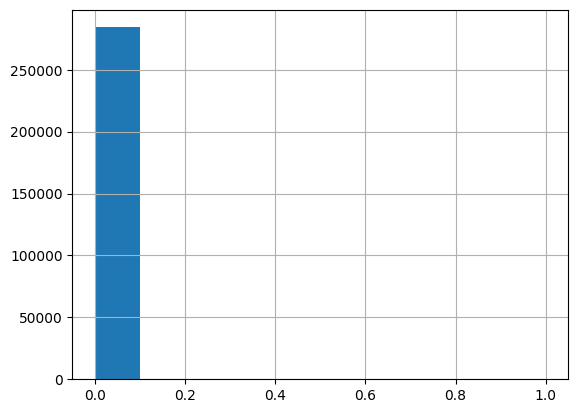

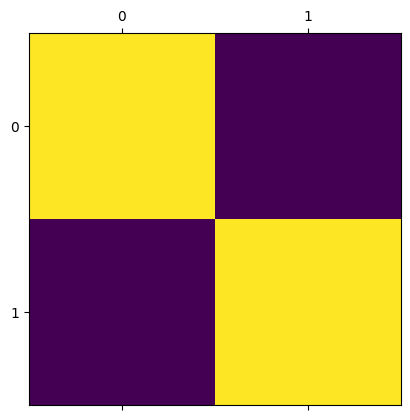

,Amount,Class
count,284807.000000,284807.000000
mean,88.349619,0.001727
std,250.120109,0.041527
min,0.000000,0.000000
25%,5.600000,0.000000
50%,22.000000,0.000000
75%,77.165000,0.000000
max,25691.160000,1.000000


In [100]:
TARGET = "Class"
ones = pd_data[pd_data["Class"] == 1]["Class"].count()
ceros = pd_data[pd_data["Class"] == 0]["Class"].count()
print("Hay ", ones," unos y ",ceros," ceros. Por lo que el data set está imbalanceado")

pd_data[["Amount",TARGET]].info()

pd_data[TARGET].hist();

plt.matshow(pd_data[["Amount",TARGET]].corr())
plt.show()


pd_data[["Amount",TARGET]].describe()

# Preprocesado

Aplique una normalización para que las features estén en el intervalo 0 a 1. Además, divida el dataset en train y test.

In [101]:
# In the data we have 27 unknown variables and an Amount Variable, which is the amount of the transaction
data = pd_data.iloc[:, :-1]

# The last element contains the labels -> Whether it is a fraudulent or non fraudulent transaction
labels = pd_data.iloc[:,-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=0
)

original_train_labels = train_labels

original_test_labels = test_labels

print(data.shape)
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)


data.head()

(284807, 29)
(227845, 29)
(56962, 29)
(227845,)
(56962,)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [102]:
# Normalize the data

# Normalize each column based on its own scale
data_train_normalized = pd.DataFrame()
data_test_normalized = pd.DataFrame()

for column in data.columns:
    max_value = train_data[column].max()
    min_value = train_data[column].min()
    data_train_normalized[column] = (train_data[column] - min_value) / (max_value - min_value)
    data_test_normalized[column] = (test_data[column] - min_value) / (max_value - min_value)

print(data.shape)
print(data_train_normalized.shape)
print(data_test_normalized.shape)


(284807, 29)
(227845, 29)
(56962, 29)


In [103]:
## CUAL ES EL OBJETIVO DE ESTO?


train_labels = ~train_labels.astype(bool)
test_labels = ~test_labels.astype(bool)


normal_train_data = data_train_normalized[train_labels]
print(normal_train_data.shape)

normal_test_data = data_test_normalized[test_labels]
print(normal_test_data.shape)


anomalous_train_data = train_data[~train_labels]
print(anomalous_train_data.shape)

anomalous_test_data = test_data[~test_labels]
print(anomalous_test_data.shape)


(227454, 29)
(56861, 29)
(391, 29)
(101, 29)


# Auto encoder

Se requiere construir un mecanismo para la detección de anomalías con un autoencoder. Vamos a considerar que los pagos fraudulentos son poco comunes y tienen algunas características especiales que no tienen el resto de pagos.

## Creación del modelo

Cree un autoencoder con encoder y decoder simétricos. Dos capas en cada uno serán suficientes, y tome como dimensión del Latent un valor entre 4 y 10.

Atención a la función de activación de la última capa del decoder!!!

In [104]:
input_tensor = Input(shape=(29,))
encoded = layers.Dense(16, activation='relu')(input_tensor)
encoded = layers.Dense(8, activation='relu')(encoded)

decoded = layers.Dense(16, activation='relu')(encoded)
decoded = layers.Dense(29, activation='sigmoid')(decoded)


autoencoder = Model(input_tensor, decoded)
autoencoder.compile(optimizer='adam', loss='mae')

autoencoder.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense_20 (Dense)            (None, 16)                480       
                                                                 
 dense_21 (Dense)            (None, 8)                 136       
                                                                 
 dense_22 (Dense)            (None, 16)                144       
                                                                 
 dense_23 (Dense)            (None, 29)                493       
                                                                 
Total params: 1253 (4.89 KB)
Trainable params: 1253 (4.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Entrenamiento

Entrene el modelo hasta alcanzar la convergencia necesaria para la detección de anomalías.

In [105]:
history = autoencoder.fit(normal_train_data, normal_train_data,
          epochs=20,
          batch_size=1024*4, # Batch alto te quita overfitting - nos intersan muchos datos para que caigan batchs con anomalías en el test?
          validation_data=(normal_test_data, normal_test_data),
          shuffle=True)


Epoch 1/20
56/56 [==============================] - 2s 13ms/step - loss: 0.1396 - val_loss: 0.1146
Epoch 2/20
56/56 [==============================] - 0s 9ms/step - loss: 0.0812 - val_loss: 0.0461
Epoch 3/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0346 - val_loss: 0.0299
Epoch 4/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0290 - val_loss: 0.0283
Epoch 5/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0280 - val_loss: 0.0277
Epoch 6/20
56/56 [==============================] - 1s 15ms/step - loss: 0.0276 - val_loss: 0.0274
Epoch 7/20
56/56 [==============================] - 1s 15ms/step - loss: 0.0273 - val_loss: 0.0271
Epoch 8/20
56/56 [==============================] - 1s 17ms/step - loss: 0.0270 - val_loss: 0.0268
Epoch 9/20
56/56 [==============================] - 1s 15ms/step - loss: 0.0267 - val_loss: 0.0263
Epoch 10/20
56/56 [==============================] - 1s 17ms/step - loss: 0.0261 - val_loss: 0.0257
Epoch 11/20
5

## Análisis de error de reconstrucción
Calcule el error cuadrático medio entre cada una de las muestras del dataset de train y la reconstrucción pasando por el autoencoder. Dibuje el histograma del error en los pagos fraudulentos y en los normales por separado, y en una misma gráfica. Comente los resultados.

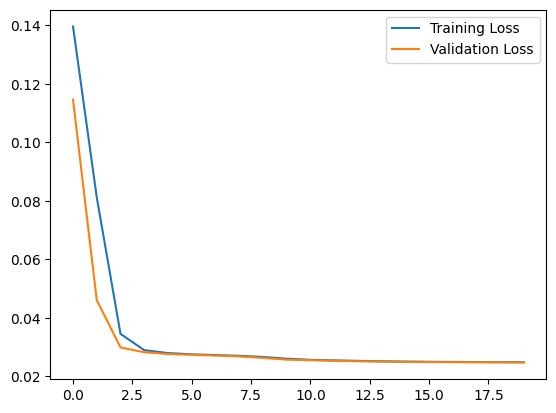

In [106]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()


7108/7108 [==============================] - 12s 2ms/step


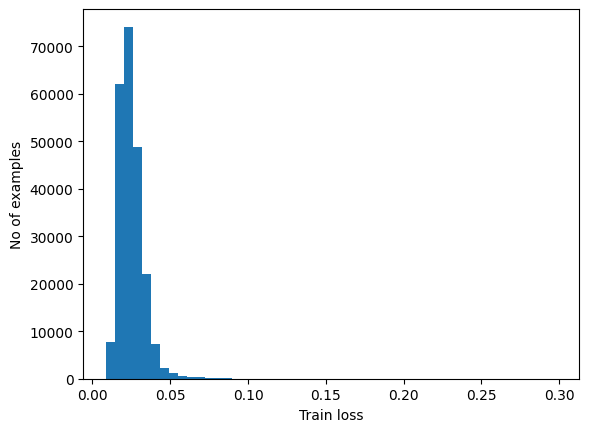

In [107]:
# decoded_payments


# Ploteamos los errores de los datos normales
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

Se puede observar que la mayor parte de los errores están por debajo del 0,1. Con el centro en 0,02. Esto determina que el error es suficientemente bajo, con un 2% de error en comparación con escala de las variables.

4/4 [==============================] - 0s 4ms/step


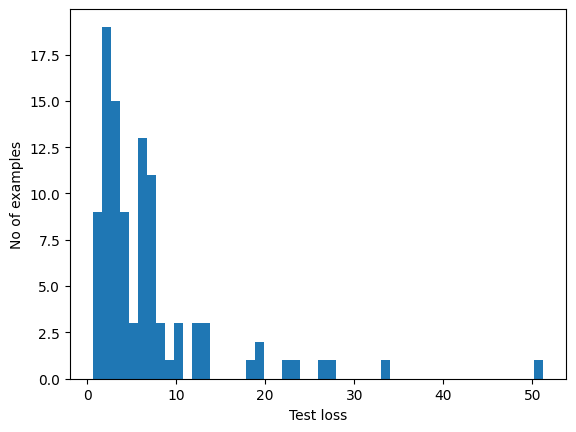

In [108]:
# Ploteamos los errores de los datos anómalos para comprobar que efectivamente son mayores como regla general.

reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()



## Elección del threshold
Vamos a tratar de elegir un buen valor de threshold del error para decidir si es un pago fradulento o no lo es. Para ello, tome unos 100 valores en el rango que toma el threshold y calcule sobre el dataset de train la precisión, el recall, el false positive rate y el true positive rate. Pinte cada uno de ellos en una gráfica (el eje x es el posible valor del threshold).

In [109]:
def false_positive_rate(y, y_pred):
    """y is 0, y_pred is 1"""
    return sum( (1- y) * y_pred) / sum(1-y)
def true_positive_rate(y, y_pred):
    """both are one"""
    return sum(y * y_pred) / sum(y)

In [110]:
# Para el threshold se suele coger el MAE (Mean absolute error - habrá que coger 100 valores cerca de ese rango y probar cuál tienen mejor resultado)
# Voy a hacer todas las funciones para un threshold y luego lo aplicamos a todo el rango.

def compute_metrics(labels, pred):
  print("Accuracy = {}".format(accuracy_score(labels, pred)))
  print("Recall = {}".format(recall_score(labels, pred)))
  print("False positive rate = {}".format(false_positive_rate(labels, pred)))
  print("True Positive rate = {}".format(true_positive_rate(labels, pred)))


# Choose a threshold value that is one standard deviations above the mean.
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)


reconstructions = autoencoder.predict(data_train_normalized)
test_loss = tf.keras.losses.mae(reconstructions, data_train_normalized)

pred = np.where(test_loss > threshold, 1, 0) # Para que vaya más rápido
# pred = [0 if l <= threshold else 1 for l in test_loss]

compute_metrics(original_train_labels, pred)

Threshold:  0.033486027312352395
7121/7121 [==============================] - 12s 2ms/step
Accuracy = 0.8875814698588953
Recall = 0.9002557544757033
False positive rate = 0.1124403176026801
True Positive rate = 0.9002557544757033


In [111]:
# Hay que coger un threshold grande para conseguir que realmente filtre, aunque en el ejemplo ponga 1 sd mayor
threshold_range = np.linspace(np.mean(train_loss), np.mean(train_loss) + 30*np.std(train_loss), 100)
threshold_range

array([0.02482799, 0.02745164, 0.03007529, 0.03269893, 0.03532258,
       0.03794623, 0.04056988, 0.04319352, 0.04581717, 0.04844082,
       0.05106447, 0.05368812, 0.05631176, 0.05893541, 0.06155906,
       0.06418271, 0.06680636, 0.06943   , 0.07205365, 0.0746773 ,
       0.07730095, 0.07992459, 0.08254824, 0.08517189, 0.08779554,
       0.09041919, 0.09304283, 0.09566648, 0.09829013, 0.10091378,
       0.10353743, 0.10616107, 0.10878472, 0.11140837, 0.11403202,
       0.11665566, 0.11927931, 0.12190296, 0.12452661, 0.12715026,
       0.1297739 , 0.13239755, 0.1350212 , 0.13764485, 0.1402685 ,
       0.14289214, 0.14551579, 0.14813944, 0.15076309, 0.15338673,
       0.15601038, 0.15863403, 0.16125768, 0.16388133, 0.16650497,
       0.16912862, 0.17175227, 0.17437592, 0.17699957, 0.17962321,
       0.18224686, 0.18487051, 0.18749416, 0.1901178 , 0.19274145,
       0.1953651 , 0.19798875, 0.2006124 , 0.20323604, 0.20585969,
       0.20848334, 0.21110699, 0.21373064, 0.21635428, 0.21897

In [112]:
# Para los datos de training, tenemos que coger un threshold en el que casi ninguna muestra sea predicha como un pago fraudulento.
# Por lo que escogemos un threshold en el que el numero de errores en la predicción sea bajo.
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)


errors = {}
for threshold in threshold_range:
  predictions = tf.math.less(train_loss, threshold)

  # Compare the two boolean arrays element-wise
  not_same_values = np.sum(train_labels[train_labels] != predictions)
  acc = accuracy_score(train_labels[train_labels], predictions)
  precision = precision_score(train_labels[train_labels], predictions)
  recall = recall_score(train_labels[train_labels], predictions)
  errors[threshold] = {"n_fraudulent":not_same_values.copy(),"acc":acc, "precision":precision,"recall":recall}




7108/7108 [==============================] - 12s 2ms/step


In [113]:
# errors

In [114]:

# Value to search for within the sub-dictionaries
target_accuracy_value = 0.95
threshold_final = 0
# Iterate over the items in the outer dictionary
for key, sub_dict in errors.items():
    # Check if the target value is present in the sub-dictionary values
    if target_accuracy_value < sub_dict["acc"]:
      # If found, print the key
      threshold_final = key
      break

print("Final selected threshold for an accuracy of 95% within the train data is: ", threshold_final)


Final selected threshold for an accuracy of 95% within the train data is:  0.04056987653371782


In [115]:
reconstructions = autoencoder.predict(data_train_normalized)
train_loss = tf.keras.losses.mae(reconstructions, data_train_normalized)


accuracy = []
recall = []
true_positives = []
false_positives = []
errors = {}

for threshold in threshold_range:
  predictions = np.where(test_loss > threshold, 1, 0)


  # Compare the two boolean arrays element-wise
  acc = accuracy_score(original_train_labels, predictions)
  accuracy.append(acc)

  rec = recall_score(original_train_labels, predictions)
  recall.append(rec)

  f_positive = false_positive_rate(original_train_labels, predictions)
  false_positives.append(f_positive)

  t_positive = true_positive_rate(original_train_labels, predictions)
  true_positives.append(t_positive)

  errors[threshold] = {"acc":acc, "recall":rec,"true_positive": t_positive, "false_positive" : f_positive}


7121/7121 [==============================] - 13s 2ms/step


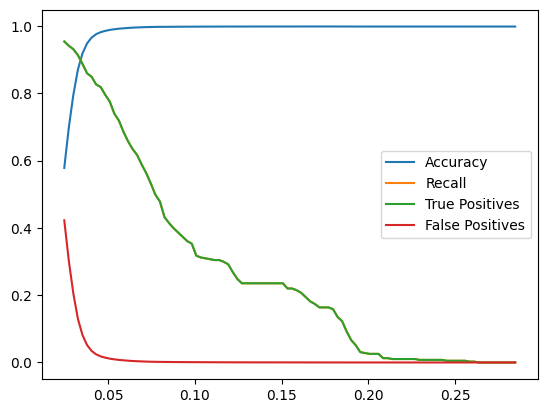

In [116]:
plt.plot(threshold_range, accuracy, label = 'Accuracy')
plt.plot(threshold_range, recall, label = 'Recall')
plt.plot(threshold_range, true_positives, label = 'True Positives')
plt.plot(threshold_range, false_positives, label = 'False Positives')



plt.legend()

**Haciendo la misma prueba sobre los fraudulentos, podemos observar que ningun error de reconstrucción está por debajo del threshold final. Por lo que el modelo los categorizaría TODOS como fraudulentos. Es decir, que es capaz de detectar los pagos fraudulentos perfectamente. Por otro lado, con este threshold, podemos detectar con un 95% de precisión los pagos no fraudulentos!**

In [117]:
reconstructions = autoencoder.predict(anomalous_train_data)
train_loss = tf.keras.losses.mae(reconstructions, anomalous_train_data)
predictions = tf.math.less(train_loss, threshold_final)
# Ninguna predicción sale True, lo que significa que ningún error de reconstrucción es menor que el threshold final.
predictions

13/13 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(391,), dtype=bool, numpy=
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, Fal

Finalmente, con todo el dataset de train

## Evaluación en test
Tomando un valor del threshold que considere adecuado, calcule la precisión, el recall, el false positive rate y el true positive rate sobre el dataset de test.

In [118]:
# Choose a threshold value that is one standard deviations above the mean.

print(threshold_final)

reconstructions = autoencoder.predict(data_test_normalized)
test_loss = tf.keras.losses.mae(reconstructions, data_test_normalized)

pred = np.where(test_loss > threshold_final, 1, 0) # Para que vaya más rápido
# pred = [0 if l <= threshold else 1 for l in test_loss]

compute_metrics(original_test_labels, pred)



0.04056987653371782
1781/1781 [==============================] - 3s 1ms/step
Accuracy = 0.965696429198413
Recall = 0.8613861386138614
False positive rate = 0.03411828845781819
True Positive rate = 0.8613861386138614


# Sparse AutoEncoder

## Creación del modelo
Repitamos todo el proceso pero usando un sparse autoencoder. Solamente añada regularización l1 en la última capa del encoder. Además, puede probar a aumentar un poco la dimensión del encoding.

In [119]:
input_tensor = Input(shape=(29,))
encoded = layers.Dense(16, activation='relu')(input_tensor)
encoded = layers.Dense(8, activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-5))(encoded)

decoded = layers.Dense(16, activation='relu')(encoded)
decoded = layers.Dense(29, activation='sigmoid')(decoded)


autoencoder = Model(input_tensor, decoded)
autoencoder.compile(optimizer='adam', loss='mae')

autoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense_24 (Dense)            (None, 16)                480       
                                                                 
 dense_25 (Dense)            (None, 8)                 136       
                                                                 
 dense_26 (Dense)            (None, 16)                144       
                                                                 
 dense_27 (Dense)            (None, 29)                493       
                                                                 
Total params: 1253 (4.89 KB)
Trainable params: 1253 (4.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Entrenamiento

In [120]:
history = autoencoder.fit(normal_train_data, normal_train_data,
          epochs=20,
          batch_size=1024*4, # Batch alto te quita overfitting - nos intersan muchos datos para que caigan batchs con anomalías en el test?
          validation_data=(normal_test_data, normal_test_data),
          shuffle=True)

Epoch 1/20
56/56 [==============================] - 2s 13ms/step - loss: 0.1319 - val_loss: 0.1017
Epoch 2/20
56/56 [==============================] - 0s 9ms/step - loss: 0.0704 - val_loss: 0.0412
Epoch 3/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0329 - val_loss: 0.0288
Epoch 4/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0284 - val_loss: 0.0282
Epoch 5/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0281 - val_loss: 0.0280
Epoch 6/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0280 - val_loss: 0.0279
Epoch 7/20
56/56 [==============================] - 1s 10ms/step - loss: 0.0279 - val_loss: 0.0278
Epoch 8/20
56/56 [==============================] - 1s 11ms/step - loss: 0.0278 - val_loss: 0.0278
Epoch 9/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0278 - val_loss: 0.0277
Epoch 10/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0277 - val_loss: 0.0277
Epoch 11/20
56/5

## Análisis de error de reconstrucción
Calcule el error cuadrático medio entre cada una de las muestras del dataset de train y la reconstrucción pasando por el autoencoder. Dibuje el histograma del error en los pagos fraudulentos y en los normales por separado en una misma gráfica. Comente los resultados.

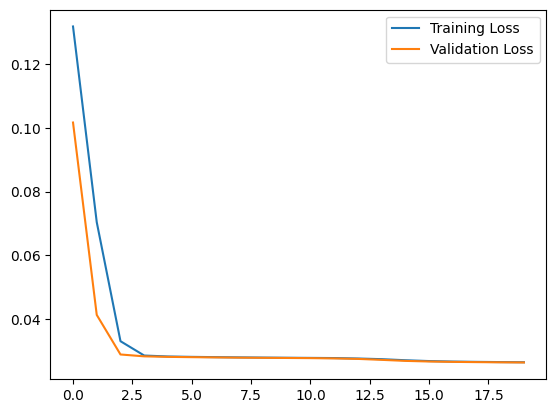

In [121]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()


7108/7108 [==============================] - 14s 2ms/step


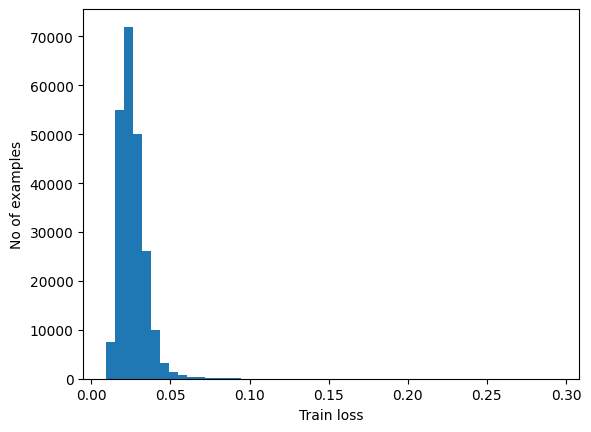

4/4 [==============================] - 0s 3ms/step


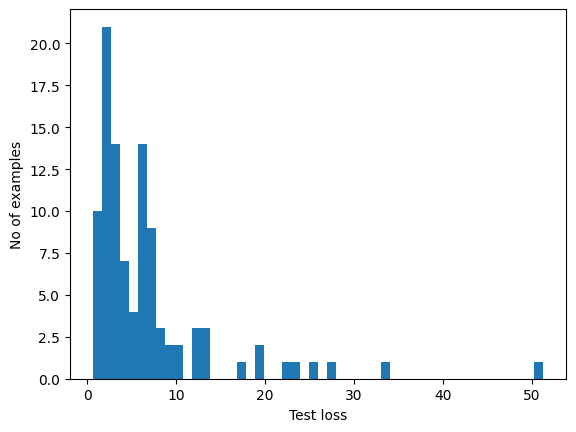

In [122]:
# Ploteamos los errores de los datos normales
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()


reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)


fig = plt.figure()
plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

## Elección del threshold
Calcule las mismas métricas de antes en función del threshold. Pinte en la misma gráfica la curva del autoencoder y la del sparse autoencoder. ¿Cuál funciona mejor?

In [123]:
# Para los datos de training, tenemos que coger un threshold en el que casi ninguna muestra sea predicha como un pago fraudulento.
# Por lo que escogemos un threshold en el que el numero de errores en la predicción sea bajo.
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

errors = {}
for threshold in threshold_range:
  predictions = tf.math.less(train_loss, threshold)
  # Compare the two boolean arrays element-wise
  not_same_values = np.sum(train_labels[train_labels] != predictions)
  acc = accuracy_score(train_labels[train_labels], predictions)
  precision = precision_score(train_labels[train_labels], predictions)
  recall = recall_score(train_labels[train_labels], predictions)
  errors[threshold] = {"n_fraudulent":not_same_values.copy(),"acc":acc, "precision":precision,"recall":recall}



7108/7108 [==============================] - 13s 2ms/step


In [124]:
# Value to search for within the sub-dictionaries
target_accuracy_value = 0.95
threshold_final = 0
# Iterate over the items in the outer dictionary
for key, sub_dict in errors.items():
    # Check if the target value is present in the sub-dictionary values
    if target_accuracy_value < sub_dict["acc"]:
      # If found, print the key
      threshold_final = key
      break

print("Final selected threshold for an accuracy of 95% within the train data is: ", threshold_final)

Final selected threshold for an accuracy of 95% within the train data is:  0.04056987653371782


7121/7121 [==============================] - 13s 2ms/step


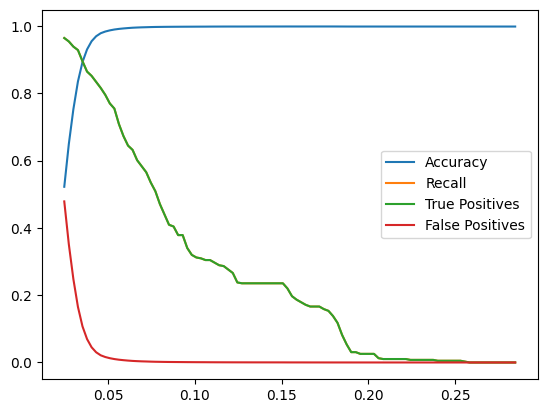

In [125]:
reconstructions = autoencoder.predict(data_train_normalized)
train_loss = tf.keras.losses.mae(reconstructions, data_train_normalized)


accuracy = []
recall = []
true_positives = []
false_positives = []
errors = {}

for threshold in threshold_range:
  predictions = np.where(train_loss > threshold, 1, 0)


  # Compare the two boolean arrays element-wise
  acc = accuracy_score(original_train_labels, predictions)
  accuracy.append(acc)

  rec = recall_score(original_train_labels, predictions)
  recall.append(rec)

  f_positive = false_positive_rate(original_train_labels, predictions)
  false_positives.append(f_positive)

  t_positive = true_positive_rate(original_train_labels, predictions)
  true_positives.append(t_positive)

  errors[threshold] = {"acc":acc, "recall":rec,"true_positive": t_positive, "false_positive" : f_positive}


plt.plot(threshold_range, accuracy, label = 'Accuracy')
plt.plot(threshold_range, recall, label = 'Recall')
plt.plot(threshold_range, true_positives, label = 'True Positives')
plt.plot(threshold_range, false_positives, label = 'False Positives')



plt.legend()


## Evaluación en test
Tomando un valor del threshold que considere adecuado, calcule la precisión, el recall, el false positive rate y el true positive rate sobre el dataset de test.

In [126]:
print(threshold_final)

reconstructions = autoencoder.predict(data_test_normalized)
test_loss = tf.keras.losses.mae(reconstructions, data_test_normalized)

pred = np.where(test_loss > threshold_final, 1, 0) # Para que vaya más rápido
# pred = [0 if l <= threshold else 1 for l in test_loss]

compute_metrics(original_test_labels, pred)


0.04056987653371782
1781/1781 [==============================] - 3s 2ms/step
Accuracy = 0.9559706470980653
Recall = 0.8712871287128713
False positive rate = 0.04387893283621463
True Positive rate = 0.8712871287128713


In [127]:
## Comparación con el modelo anterior

# 0.04055768189841171
# 1781/1781 [==============================] - 6s 3ms/step
# Accuracy = 0.9648362065938696
# Recall = 0.8613861386138614
# False positive rate = 0.034980039042577515
# True Positive rate = 0.8613861386138614

In [128]:
# Son muy parecidos, elegimos el segundo modelo

# Elección del threshold en base a un Caso de Uso
En este apartado tome la versión del autoencoder que haya dado mejores resultados.

Planteemos el siguiente Caso de Uso:

Cuando detectamos que un pago puede ser fraudulento, podemos hacer una llamada al cliente para que confirme que ha sido él quien ha realizado el pago; en este caso estimamos el coste de la llamada en 50 céntimos.
También podemos confiar en que el cliente posteriormente nos llame para notificar el fraude y cancelar el pago; en este caso, se realiza una gestión más cara que estimamos en unos 2 euros.

¿Cuál debería ser el threshold para minimizar el coste? Explique el razonamiento.

In [129]:
COST_CALL = 0.5
COST_CANCELATION = 2

In [130]:
# Si True Positive -> Detecto bien un caso anómalo -> reduzco el coste que sería de 2€ a 0.5 (Ahorro 1.5€)
# En (1 - TP) pierdo 2€
# Si es un False Positive -> Detecto un caso anómalo y no lo hay -> Gasto 0.5€ cuando no era necesario (Gasto 0.5€)
# Break even point -> Vale la pena equivocarse hasta 4 veces por detectar un caso anómalo

# (1- TP) 4 veces menor que FP

In [131]:
# Value to search for within the sub-dictionaries
target_ratio = 0.5/2
best_value = 50 # Big number to start with
threshold_final = 0
# Iterate over the items in the outer dictionary
for key, sub_dict in errors.items():
    # Check if the target value is present in the sub-dictionary values

    try:
      ratio_error = abs(target_ratio - sub_dict["false_positive"]/sub_dict['true_positive'])
    except:
      break

    if ratio_error < best_value:
      # If found, print the key
      best_value = ratio_error
      real_value = sub_dict["false_positive"]/sub_dict['true_positive']
      threshold_final = key

print(f"Final selected threshold is {threshold_final} with FP to TP ratio of {real_value} which has an error of {best_value} from the perfect value")

Final selected threshold is 0.030075285094657928 with FP to TP ratio of 0.2640184826184815 which has an error of 0.014018482618481487 from the perfect value


# Conclusiones del estudio

Detallar las principales conclusiones extraidas sobre la construcción del modelo Autoencoder, la comparativa entre modelos y su aplicación en sistemas de detección de anomalías.

En esta práctica hemos visto la gran capacidad que tienen los autoencoders como detectores de comportamientos anómalos. No hemos visto una diferencia considerable para este dataset con la sparsity. Es probable que con un mayor número de variables resulte una estrategia efectiva para reducir el ruido de las variables.

Por útlimo hemos visto la gran adaptabilidad que tiene este sistema con la elección de thresholds que nos permite adaptar nuestro modelo para distintos casos de uso, como la reducción de costes en la gestión de incidencias.

